# Filters

## <b> Filter </b>

1. Purpose <br>
(가로선 , 세로선, 대각선 등등) 각각 다른 특징을 뽑아낼 값을 학습 하는 것 <br>
2. Feature

 1. Parameter Sharing
 2. Local connectivity
    - 지역성을 유지하기 위해서 생긴것 그대로 들어가야함 
         (DNN은 Flatten이 필수하기 때문에 불가, 하지만 CNN은 2차원이 그대로 들어감)
      최종적으로는 펴지지만, 그 단계에서의 지역성을 보존할 수 있어서 CNN을 써야함 <br>

3. 학습방법 <br>
최초에 랜덤값을 가지고 Feed Forward를 하고 <br>
발생한 오차를 Back Progation하여 Parameter를 업데이트 시킴 <br>
이처럼 filter들은 학습의 대상이 된다. (고정된 값을 갖는게 아님)<br><br>
4. 구성
 1. 개수 : filters = 32 (32개의 필터) → 많이 쓸수록 성능이 좋아짐
 2. 크기 : kernel_size = (3,3) # 필터를 적용시킬 Input data or Feature Map 두께 n에 자동으로 맞춰짐 kernel_size = (3,3,n)
 3. 두께 (= channel)<br>
  - 필터를 여러개 사용하면 channel (두께)이 생긴다.
  - 필터를 3개 쓰면 3개의 두께 (3장)
  - 필터 사용시에는 이전 Feature map의 (채널)두께와 맞춰줘야 하는데 <br> 
    이는, 별도 지정없이 tensorflow에서 자동으로 지원됨
     - 흑백은 채널이 1 , 컬러는 채널이 3개 (R, G, B) 
     - ```각 필터당 (= n장 Feature map @ n채널의 필터) 2차원의 1개 Feature map 생성```
     - (중요) 필터의 개수만큼 다음 피처맵이 생기는 것 : 이전 피처맵은 동일한 두께의 필터를 만나 연산되면서 1차원으로 되기 때문에 장수가 중요하지 않고 현재 적용하는 필터의 개수로 피처맵이 생성되게됨
















In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Fashion-MNIST Data_Set Load

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# II. Image 확인

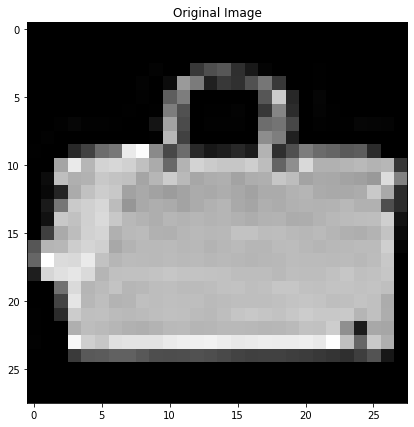

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 7))
plt.imshow(X_train[99], cmap = 'gray')
plt.title('Original Image')
plt.show()

# III. Filter 생성 및 Image 수정

Filter 값은 <br>
원래 초기값 랜덤 parameter값을 갖고, <br>
Forward - Backpropagration 을 반복해가면서<br>
학습해 가는 변화값이지만, <br>
실습은 이해를 위해 학습의 결과 값이라고 가정하고 고정해본다.<br>
<br>

```가정상황 : 학습 결과 가로선, 세로선 2가지 특징을 추출하는 2가지 필터가 생성됨``` <br>


> ## 1) 가로선 추출 필터

In [ ]:
import numpy as np

H_Filter = np.array([[-1., -2., -1.], 
                     [0., 0., 0.], 
                     [1., 2., 1.]])

print(H_Filter)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


> ## 2) 세로선 추출 필터

In [ ]:
V_Filter = np.array([[-1., 0., 1.],
                     [-2., 0., 2.],
                     [-1., 0., 1.]])

print(V_Filter)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


> ## 3) 이미지 크기 변경

* (28 x 28) -> (27 x 27)
* filter가 (3x3) 이기 때문에 3의 배수로 맞춰줌
* tensorflow에서는 알아서 맞춰줌

In [ ]:
import cv2

test_image = cv2.resize(X_train[99], (27, 27))

print(X_train[99].shape, test_image.shape)

(28, 28) (27, 27)


# IV. Convolutional with Filters

> ## 1) conv_image( ) 정의

In [ ]:
filter_size = 3
output_size = 25

def conv_image(filter):
    filtered_image = np.zeros((output_size, output_size))
    
    for i in range(output_size):
        for j in range(output_size):
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
            indice_sum = np.sum(indice_image)

            if(indice_sum > 255):
                indice_sum = 255
            filtered_image[i, j] = indice_sum

    return filtered_image

> ## 2) H_Filter 적용

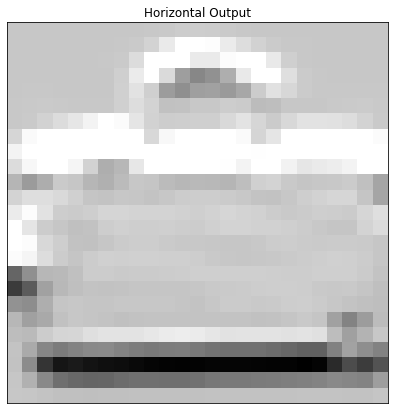

In [ ]:
H_conv_image = conv_image(H_Filter)

plt.figure(figsize = (7, 7))
plt.xticks([])
plt.yticks([])
plt.title('Horizontal Output')
plt.imshow(H_conv_image, cmap = 'gray')

plt.show()

> ## 3) V_Filter 적용

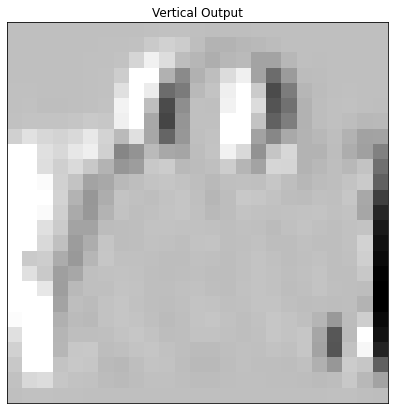

In [ ]:
V_conv_image = conv_image(V_Filter)

plt.figure(figsize = (7, 7))
plt.xticks([])
plt.yticks([])
plt.title('Vertical Output')
plt.imshow(V_conv_image, cmap = 'gray')

plt.show()

# V. 최종 결과

* V_Filter and H_Filter

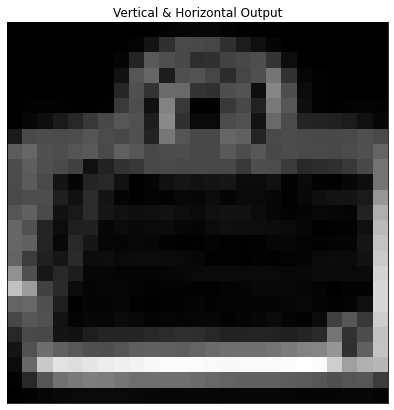

In [ ]:
sobel_image = np.sqrt(np.square(H_conv_image) + np.square(V_conv_image))

plt.figure(figsize = (7, 7))
plt.xticks([])
plt.yticks([])
plt.title('Vertical & Horizontal Output')
plt.imshow(sobel_image, cmap = 'gray')
plt.show()

# 
# 
# 
# The End
# 
# 
# 